In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


## Import train and test datasets
* Data prepared in feature_engineering.ipynb

In [83]:
X_train = pd.read_csv("data_files/X_train.csv")
X_test = pd.read_csv("data_files/X_test.csv")
y_train = pd.read_csv("data_files/y_train.csv")
y_test = pd.read_csv("data_files/y_test.csv")

* Initialize Linear Regression model

In [84]:
lin_reg = LinearRegression()

* Train LinearRegression model on train datasets

In [85]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


* Predict burned calories using LinearRegression

In [86]:
y_preg_lr = lin_reg.predict(X_test)

* Calculate and display metrics to assess Linear Regression model performance

In [87]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_preg_lr))
r2_lr = r2_score(y_test, y_preg_lr)

print(f"Linear Regression RMSE: {round(rmse_lr, 2)}")
print(f"LinearRegression R2 Score: {round(r2_lr, 4)}")

Linear Regression RMSE: 109.95
LinearRegression R2 Score: 0.8832


* Initialize Random Forest Reggressor model

In [88]:
rf_reg = RandomForestRegressor(random_state=42)

* Train Random Forest Regressor on train datasets

In [89]:
rf_reg.fit(X_train, y_train)

/Users/aleksandramatacz/miniconda3/envs/running_ML/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


* Predict calories burned using Random Forest Regressor model

In [90]:
y_pred_rf = rf_reg.predict(X_test)

* Calculate and display metrics to assess Random Forest Regressor model performance

In [91]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {round(rmse_rf, 2)}")
print(f"Random Forest R2 Score: {round(r2_rf, 4)}")

Random Forest RMSE: 101.61
Random Forest R2 Score: 0.9003


### Hyperparameter Tuning

* Prepare parameters for GridSearch

In [92]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

* Use GridSearchCV with prepared parameters and Random Forest Regressor

In [93]:
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=1
)

* Train Grid Search on training data 

In [94]:
grid_search.fit(X_train, y_train)

/Users/aleksandramatacz/miniconda3/envs/running_ML/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aleksandramatacz/miniconda3/envs/running_ML/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aleksandramatacz/miniconda3/envs/running_ML/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aleksandramatacz/miniconda3/envs/running_ML/lib/python3.12/site-packages/sklea

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


* Get best parameters and Roor Mean Squared Errors

In [95]:
print(f"Best parameters: {grid_search.best_params_}")

best_rmse = -grid_search.best_score_
print(f"Best RMSE from tuning: {round(best_rmse, 2)}")

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE from tuning: 57.77


* Save Random Forest Regressor with best parameters

In [96]:
best_rf = grid_search.best_estimator_

* Predict calories burned with saved model

In [97]:
y_pred_tuned = best_rf.predict(X_test)

* Calculate and display metrics to assess best model performance

In [98]:
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Final RMSE after tuning: {round(rmse_tuned, 2)}")
print(f"Final R2 Score after tuning: {round(r2_tuned, 4)}")

Final RMSE after tuning: 101.49
Final R2 Score after tuning: 0.9005


* Compare results from Linear Regression, Random Forest Regression and Random Forest Regression after hyperparameter tuning

In [99]:
scores = {
    'Model': ['LinearRegression', 'Random Forest (Initial)', 'Random Forest (Tuned)'],
    'RMSE': [rmse_lr, rmse_rf, rmse_tuned],
    'R2 Score': [r2_lr, r2_rf, r2_tuned]
}

score_df = pd.DataFrame(scores)
score_df['RMSE'] = score_df['RMSE'].apply(lambda x: round(x, 2))
score_df['R2 Score'] = score_df['R2 Score'].apply(lambda x: round(x, 2))
score_df = score_df.sort_values(by='RMSE', ascending=True)

* Display results

In [100]:
score_df

,Model,RMSE,R2 Score
2,Random Forest (Tuned),101.49,0.90
1,Random Forest (Initial),101.61,0.90
0,LinearRegression,109.95,0.88


* Display features importance to know which features are most impactful 

In [101]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

In [102]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df['Importance (%)'] = (feature_importance_df['Importance'] * 100).round(2)


In [103]:
feature_importance_df[['Feature', 'Importance (%)']]

,Feature,Importance (%)
0,distance,56.48
6,burned_calories_per_minute,24.79
3,elapsed_time,10.91
1,avg_hr,4.32
8,activity_type_walking,1.25
2,avg_speed,1.08
5,hr_zone,0.93
7,activity_type_running,0.17
4,indoor_activity,0.07


* Save model to file

In [104]:
joblib.dump(best_rf, 'final_calorie_prediction_model.pkl')

['final_calorie_prediction_model.pkl']

* Visualize model performance

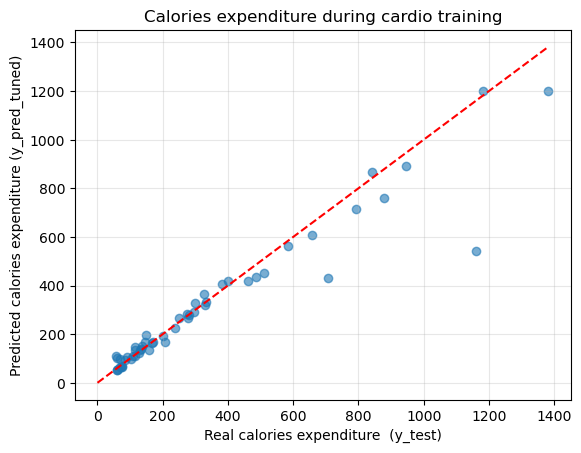

In [113]:
plt.scatter(y_test, y_pred_tuned, alpha=0.6)

max_val = max(y_test['calories'].max(), y_pred_tuned.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.title('Calories expenditure during cardio training')
plt.xlabel('Real calories expenditure  (y_test)')
plt.ylabel('Predicted calories expenditure (y_pred_tuned)')
plt.grid(True, alpha=0.3)

plt.show()